In [14]:
import requests, zipfile, io, gzip, glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
%matplotlib inline
from obspy import read

In [4]:
#Read

st = read('C:/Users/jepul/OneDrive/Escritorio/Seismology/SR_DATA/sandra_ridge - Copy/LAB/2015-01-24-1800-00.XX_00000__003')

In [5]:
tr = st[0]
print(tr)

XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples


In [23]:
# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
z = np.asarray(tr[0].data)
n=tr.data

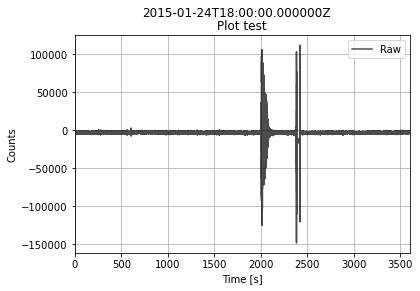

In [22]:
plt.plot(t, tr.data, 'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 3600)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

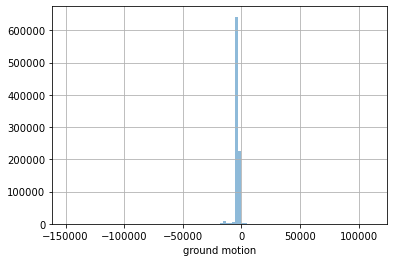

In [24]:
# type below
pt=plt.hist(n,100,alpha=0.5,label='noise');plt.grid(True);plt.xlabel('ground motion');plt.show()

In [25]:
# Cual sera ?

print('the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(n),np.std(n)**2,scipy.stats.skew(n),scipy.stats.kurtosis(n)))

the mean is -3489.48, the variance is 14903684.14, the skewness is -1.14, the kurtosis is 167.86


In [16]:
# Cual sera ?
print('the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(t),np.std(t)**2,scipy.stats.skew(t),scipy.stats.kurtosis(t)))

the mean is 1803.00, the variance is 1083605.40, the skewness is 0.00, the kurtosis is -1.20


In [37]:
from scipy.fftpack import fft, ifft, fftfreq, next_fast_len

npts = tr.stats.npts
## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(int(tr.data.shape[0])) # this will be an even number
freqVec = fftfreq(Nfft, d=tr.stats.delta)[:Nfft//2]
Zhat = fft(tr.data,n=Nfft)#/np.sqrt(Z[0].stats.npts)


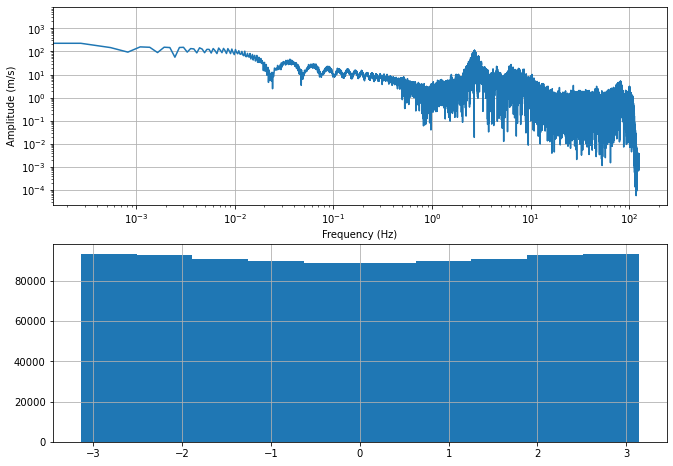

In [38]:
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(freqVec,np.abs(Zhat[:Nfft//2])/Nfft)
ax[0].grid(True)
ax[0].set_xscale('log');ax[0].set_yscale('log')
ax[0].set_xlabel('Frequency (Hz)');ax[0].set_ylabel('Amplitude (m/s)')
ax[1].hist(np.angle(Zhat))
ax[1].grid(True)


3603.2000000000003


C:\Users\jepul\AppData\Local\Temp\ipykernel_24436\1525372917.py:7: RuntimeWarning: divide by zero encountered in log10
  ax[0].pcolormesh(t/3600, f, np.log10(np.abs(Zxx)), vmin=-1, vmax=3.5, shading='gouraud')


(0.1, 40)

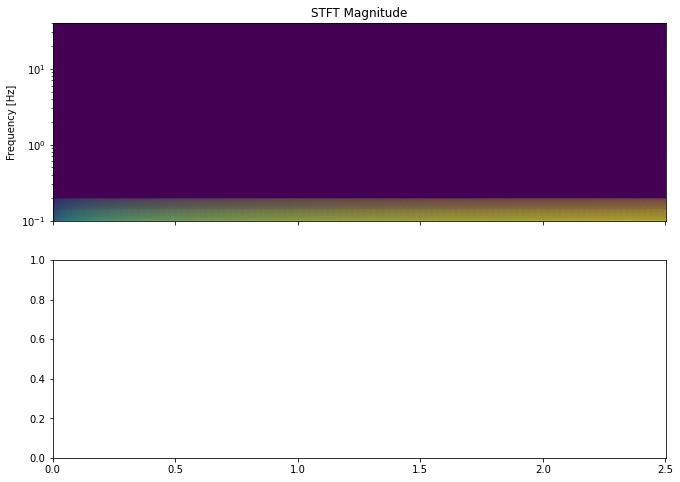

In [40]:
from scipy.signal import stft

nperseg=1000
f, t, Zxx = stft(t, fs=100, nperseg=nperseg,noverlap=200)
print(np.max(np.max(np.abs(Zxx))))
fig,ax=plt.subplots(2,1,figsize=(11,8),sharex=True)
ax[0].pcolormesh(t/3600, f, np.log10(np.abs(Zxx)), vmin=-1, vmax=3.5, shading='gouraud')
ax[0].set_title('STFT Magnitude')
ax[0].set_ylabel('Frequency [Hz]')
# ax[0].set_xlabel('Time [Hours]')
ax[0].set_yscale('log');ax[0].set_ylim(0.1,40)

In [8]:
tp = np.array(tr)
t = np.array(t)

In [9]:
print(np.shape(tp.T))
print(tp.T)
print(np.shape(t.T))
print(t.T)
print(type(tp.T))
print(type(t.T))
print(len(tp.T))
print(len(t.T))

(901501,)
[-2914 -4543 -5458 ... -4178 -4208 -4278]
(901501,)
[0.000000e+00 4.000000e-03 8.000000e-03 ... 3.605992e+03 3.605996e+03
 3.606000e+03]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
901501
901501


In [10]:
data= t, tp

In [11]:
q=pd.DataFrame({'Trace':data})

In [12]:
q.describe
pd
type(q)
q


,Trace
0,"[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,..."
1,"[-2914, -4543, -5458, -5576, -5218, -5672, -53..."


TypeError: 'AxesSubplot' object is not subscriptable

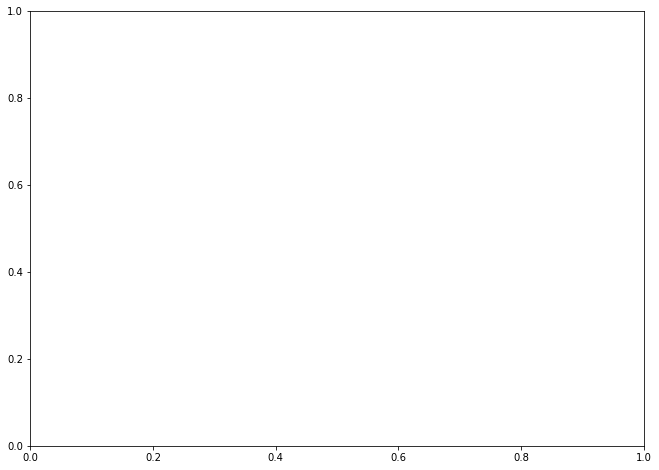

In [13]:
fig,ax=plt.subplots(1,1,figsize=(11,8),sharex=True)
ax[0].plot(q['date_year'],q['east'][q['station']==sta]);ax[0].grid(True);ax[0].set_ylabel('East (mm)')
ax[2].set_xlabel('Time (years)')